In [ ]:
# Start writing code here...# Start writing code here...from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
spotify_songs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')


Q1 = np.percentile(spotify_songs.duration_ms, 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(spotify_songs.duration_ms, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

"""
mask = (spotify_songs.duration_ms < (Q3+1.5*IQR))
mask2 = spotify_songs.duration_ms > (Q1-1.5*IQR)
spotify_data_cleaned = spotify_songs.loc[mask]
spotify_data_cleaned = spotify_data_cleaned.loc[mask2]
"""
spotify_data_cleaned = spotify_songs
spotify_data_cleaned.track_album_release_date.str[:4]
spotify_data_cleaned.track_album_release_date.str[5:7]
spotify_data_cleaned = spotify_data_cleaned.assign(
    track_album_release_month = spotify_data_cleaned.track_album_release_date.str[5:7],
    track_album_release_year = spotify_data_cleaned.track_album_release_date.str[:4],
)
spotify_data_cleaned.drop(columns="track_album_release_date",inplace=True)
spotify_data_cleaned.track_album_release_year = spotify_data_cleaned.track_album_release_year.astype("int64")
"""
mask = (spotify_data_cleaned.track_popularity > 0)
spotify_data_cleaned = spotify_data_cleaned.loc[mask]
"""


'\nmask = (spotify_data_cleaned.track_popularity > 0)\nspotify_data_cleaned = spotify_data_cleaned.loc[mask]\n'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalisation(data):
    columns = ["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms", "track_album_release_year"]
    data_norme = data[columns]
    scaler = MinMaxScaler(feature_range=(0,1))
    data_norme = pd.DataFrame(scaler.fit_transform(data_norme), columns=columns)
    return data_norme


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## ONE VS ONE

In [ ]:
def OVOClassifier(data_normed_quanti,data):
    xx = data_normed_quanti
    yy = data.playlist_genre
    X_train, X_test, y_train, y_test = train_test_split(xx, yy, train_size=0.66)
    clf = OneVsOneClassifier(
    LinearSVC(random_state=0)).fit(X_train, y_train)
    return clf.score(X_test,y_test), confusion_matrix(y_test, clf.predict(X_test),labels=['rap', 'edm', 'rock','latin','pop','r&b'])
score, cm = OVOClassifier(normalisation(spotify_data_cleaned),spotify_data_cleaned)


score one vs one class :  0.5038516660695092


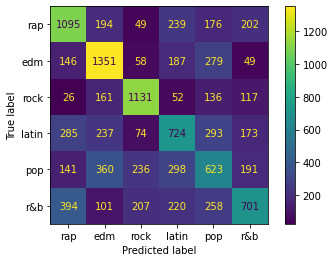

In [ ]:
print("score one vs one class : ", score)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['rap', 'edm', 'rock','latin','pop','r&b']).plot()

## One versus rest

In [ ]:
def OVRClassifier(data_normed_quanti,data):
    xx = data_normed_quanti
    yy = data.playlist_genre
    X_train, X_test, y_train, y_test = train_test_split(xx, yy, train_size=0.66)
    clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
    return clf.score(X_test,y_test), confusion_matrix(y_test, clf.predict(X_test),labels=['rap', 'edm', 'rock','latin','pop','r&b'])

score, cm = OVRClassifier(normalisation(spotify_data_cleaned),spotify_data_cleaned)

score one vs rest class :  0.5142422070942314


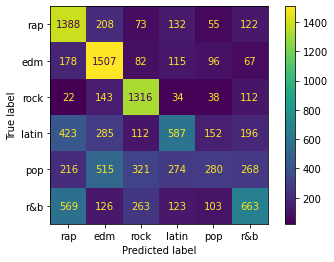

In [ ]:
print("score one vs rest class : ", score)
cm_display = ConfusionMatrixDisplay(cm,display_labels=['rap', 'edm', 'rock','latin','pop','r&b']).plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2ad4461-7f35-42f5-b2d9-f686e8952f67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>